In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\user\Downloads\archive (8).zip")

In [5]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [7]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [13]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%B %d, %Y')

In [15]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,"January 05, 2019",13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,"March 08, 2019",10:29,Cash,76.40,4.761905,3.8200,9.6


In [19]:
duplicates = df.duplicated()
print("duplicate Rows:\n",duplicates)
print("Number of Duplicates:",duplicates.sum())
print("Duplicate rows:\n",df[duplicates])

duplicate Rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool
Number of Duplicates: 0
Duplicate rows:
 Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [23]:
Q1 = df['Tax 5%'].quantile(0.25)
Q3 = df['Tax 5%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliners = df[(df['Tax 5%'] < lower_bound) | (df['Tax 5%'] > upper_bound)]
print(f"Numbers od Outliners in 'Tax 5%':{len(outliners)}")
print("Outliners:")
print(outliners[['Tax 5%']])

Numbers od Outliners in 'Tax 5%':9
Outliners:
     Tax 5%
166  47.790
167  49.490
350  49.650
357  47.720
422  48.605
557  49.260
699  48.750
792  48.685
996  48.690


In [25]:
df_clean = df[(df['Tax 5%'] >= lower_bound) & (df['Tax 5%'] <= upper_bound)]
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original shape: (1000, 17)
Cleaned shape: (991, 17)
Rows removed: 9


In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: title={'center': 'sales over time'}, xlabel='Date'>

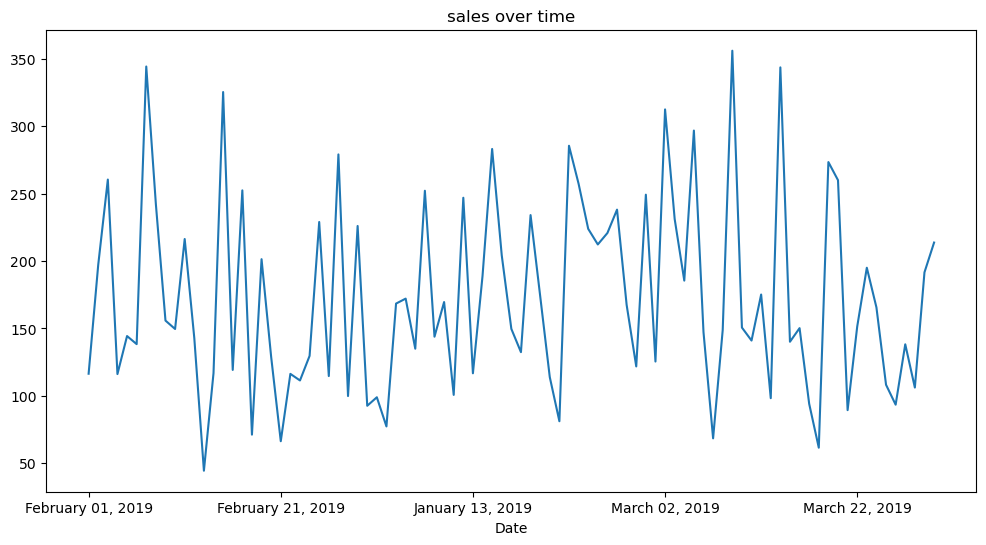

In [29]:
df.groupby('Date')['gross income'].sum().plot(figsize=(12,6),title='sales over time')

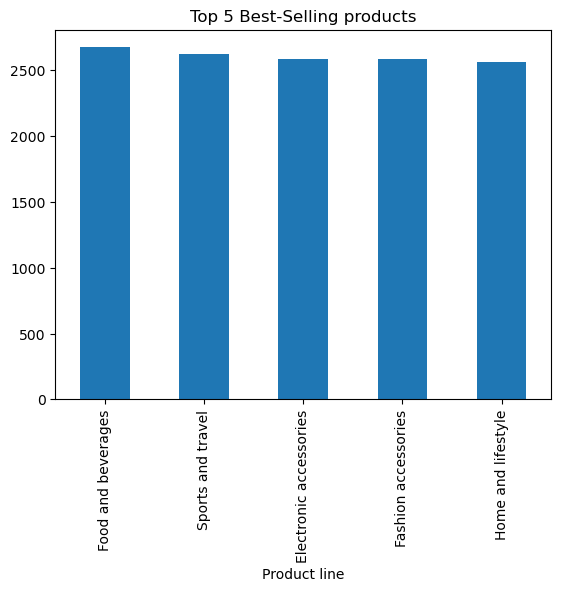

In [31]:
top_products = df.groupby('Product line')['gross income'].sum().nlargest(5)
top_products.plot(kind='bar', title='Top 5 Best-Selling products')
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
data = pd.read_csv(r"C:\Users\user\Downloads\archive (8).zip")


In [ ]:
data['